## Problem Statement:
The objective of this Case is to Predication of bike rental count on daily based on the environmental and seasonal settings. Our goal is to develop and optimize Machine Learning models that effectively predict the bike rental count for the day



In [1]:
#Load libraries
import os
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

Laad dataset into dataframe

In [2]:
df = pd.read_csv("./day.csv")

In [10]:
df.head()





,id,datetime,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Dataset
This dataset contains 731 rows and 16 columns
columns are as follows :
- instant: record index
- dteday: date
- season: season (1:spring, 2:summer, 3:fall, 4:winter)
- yr: year (0: 2011, 1:2012)
- mnth: month ( 1 to 12)
- holiday: weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday: day of the week
- workingday: if day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit:
* 1: Clear, Few clouds, Partly cloudy,
* 2: Mist and Cloudy, Mist and Broken clouds, Mist and Few clouds, Mist
* 3: Light Snow, Light Rain and Thunderstorm and Scattered clouds, Light Rain an dScattered clouds
* 4: Heavy Rain and Ice Pallets and Thunderstorm and Mist, Snow and Fog
- temp: Normalized temperature in Celsius. The values are divided to 41 (max)
- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

rename columns of dataset for better understanding

In [11]:

df.rename(columns={'instant':'id','dteday':'datetime','yr':'year','mnth':'month','weathersit':'weather_condition',
                       'hum':'humidity','cnt':'total_count'},inplace=True)

In [12]:
df['actual_season'] = df['season'].replace({1:"Spring",2:"Summer",3:"Fall",4:"Winter"})
df['actual_holiday'] = df['holiday'].replace({0:"Working day",1:"Holiday"})
df['act_weather_condition'] = df['weather_condition'].replace({1:"Clear",2:"Cloudy/Mist",3:"Light Rain/snow/Scattered clouds",4:"Heavy Rain/Snow/Fog"})
df['actual_weekday'] = df['weekday'].replace({0:"Monday",1:"Tuesday", 2:"Wednesday",3:"Thursday",4:"Friday",5:"Saturday",6:"Sunday"})


In [13]:
df.head()

,id,datetime,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count,actual_season,actual_holiday,act_weather_condition,actual_weekday
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Spring,Working day,Cloudy/Mist,Sunday
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,Spring,Working day,Cloudy/Mist,Monday
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,Spring,Working day,Clear,Tuesday
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,Spring,Working day,Clear,Wednesday
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,Spring,Working day,Clear,Thursday


In [14]:
####################################Missing values in dataset###########################################
df.isnull().sum()

id                       0
datetime                 0
season                   0
year                     0
month                    0
holiday                  0
weekday                  0
workingday               0
weather_condition        0
temp                     0
atemp                    0
humidity                 0
windspeed                0
casual                   0
registered               0
total_count              0
actual_season            0
actual_holiday           0
act_weather_condition    0
actual_weekday           0
dtype: int64

There is no missing value present in dataset

In [15]:
##########################################data visualization##############################################3
import matplotlib.pyplot as plt

<BarContainer object of 731 artists>

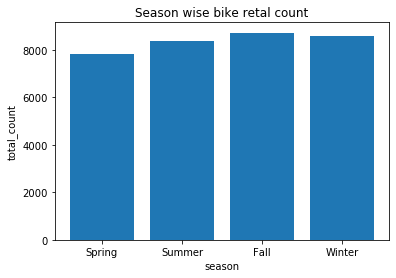

In [16]:
plt.title('Season wise bike retal count')
plt.ylabel('total_count')
plt.xlabel('season')
plt.bar(df["actual_season"],df["total_count"],  align='center')


<BarContainer object of 731 artists>

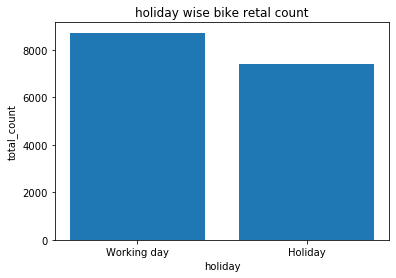

In [17]:
plt.title('holiday wise bike retal count')
plt.ylabel('total_count')
plt.xlabel('holiday')
plt.bar(df["actual_holiday"],df["total_count"], align='center')

<BarContainer object of 731 artists>

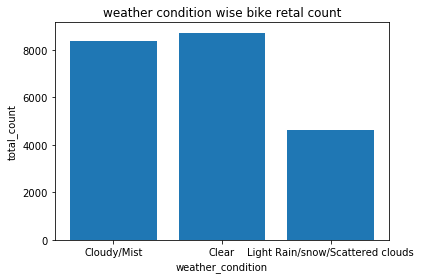

In [18]:
plt.title('weather condition wise bike retal count')
plt.ylabel('total_count')
plt.xlabel('weather_condition')

plt.bar(df["act_weather_condition"],df["total_count"], align='center')

- From the above plots, we can see that the bike rental count is increased in spring and summer season and then decreased in fall and winter season.
- bike rental count is high on working day than holiday
- Total bike rental count reduced in light rain/snow condition

Text(0.5, 0, 'Tempreture (Celsius)')

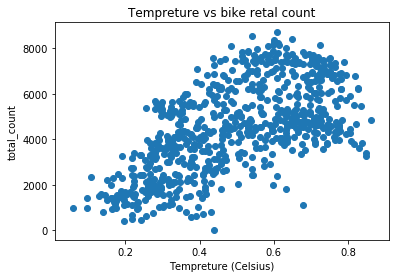

In [19]:
plt.scatter( df["temp"],df["total_count"])
plt.title('Tempreture vs bike retal count')
plt.ylabel('total_count')
plt.xlabel('Tempreture (Celsius)')

Text(0.5, 0, 'atemp')

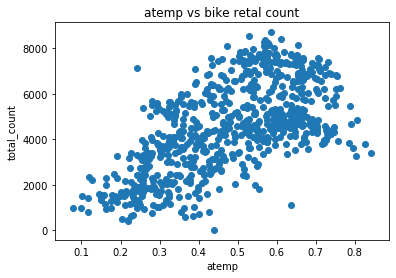

In [20]:
plt.scatter( df["atemp"],df["total_count"])
plt.title('atemp vs bike retal count')
plt.ylabel('total_count')
plt.xlabel('atemp')

Text(0.5, 0, 'humidity')

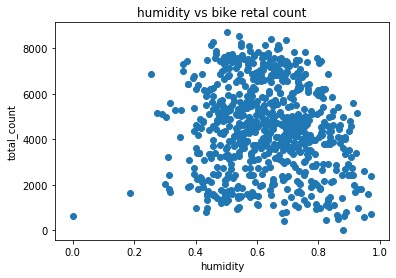

In [21]:
plt.scatter( df["humidity"],df["total_count"])
plt.title('humidity vs bike retal count')
plt.ylabel('total_count')
plt.xlabel('humidity')

Text(0.5, 0, 'windspeed')

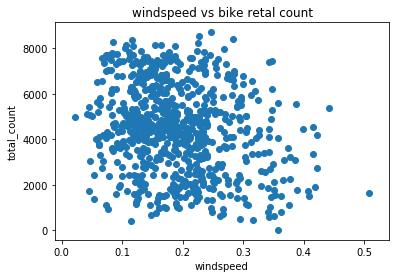

In [22]:
plt.scatter( df["windspeed"],df["total_count"])
plt.title('windspeed vs bike retal count')
plt.ylabel('total_count')
plt.xlabel('windspeed')




- From Temprature vs bike count plot we can see that there is slight positive correlation 
- From humidity vs bike count plot we can see there is slight negative correlation
- From windspeed vs bike count plot we can see there is no correlation

Text(0.5, 1.0, 'humidity')

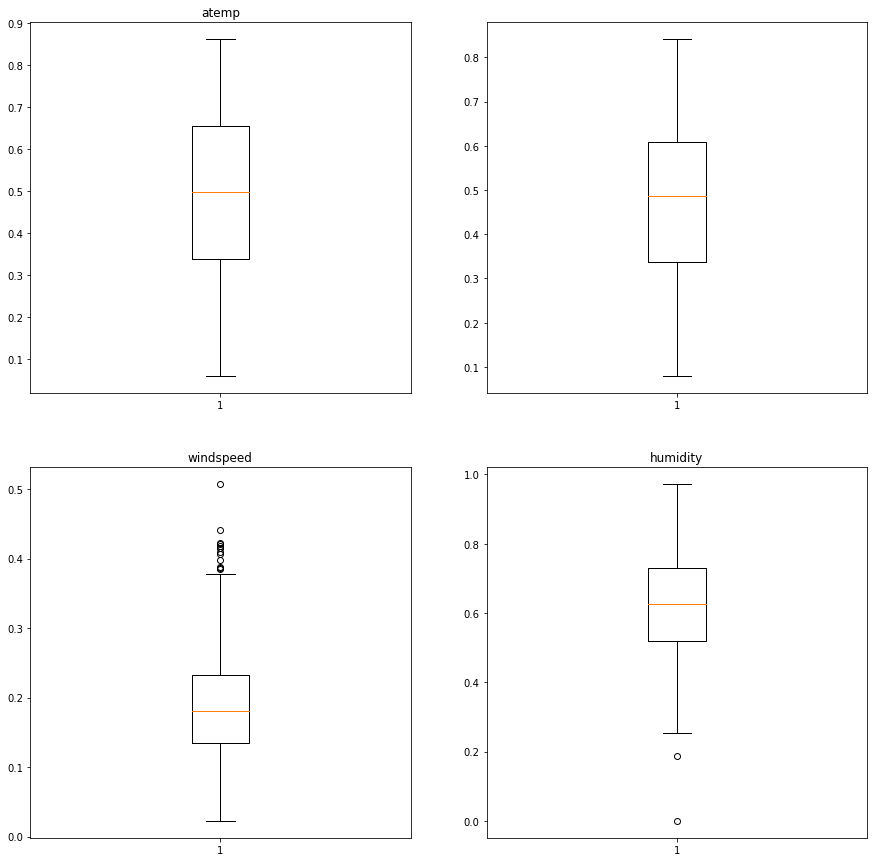

In [23]:
##################################################Outlier analysis################################################
fig, axs = plt.subplots(2, 2,figsize=(15,15))

# basic plot

axs[0, 0].boxplot(df["temp"])
axs[0, 0].set_title('temp')

axs[0, 1].boxplot(df["atemp"])
axs[0, 0].set_title('atemp')

axs[1, 0].boxplot(df["windspeed"])
axs[1, 0].set_title('windspeed')

axs[1, 1].boxplot(df["humidity"])
axs[1, 1].set_title('humidity')


- From the box plot, we can observed that no outliers are present in temp,total_count and registered variables but  few outliers are present in windspeed,and humidity variable.
- lets replace outlier with na and impute na with mean value

In [24]:
# impute outlier with mean value
new_df=pd.DataFrame(df,columns=['windspeed','humidity'])
 #Cnames for outliers                     
cnames=['windspeed','humidity']
max=0.4  
new_df.loc[new_df.loc[:,'windspeed']>max,:'windspeed']=df["windspeed"].mean() #Replace with NA
min=0.2
new_df.loc[new_df.loc[:,'humidity']>max,:'humidity']=df["humidity"].mean()  #Replace with NA


In [25]:
df['windspeed']=df['windspeed'].replace(new_df['windspeed'])
df['humidity']=df['humidity'].replace(new_df['humidity'])


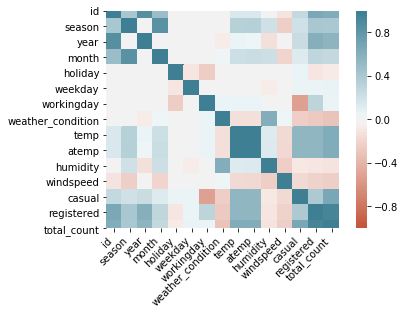

In [26]:
##################################Feature Selection#############################################################
import seaborn as sns
cname = list(df.columns)
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

- temp and atemp are strongly correlated
- If both features are included in the model, this will cause the issue of Multicollinearity. Hence we will take only one temperature feature into the model.
- The features casual and registered are removed because that is what we are going to predict.

In [27]:
#Create a new subset for training model
bike_df = df[['season','year','month','holiday', 'weekday','workingday','weather_condition','temp','humidity','windspeed','total_count']]
bike_df.head()

,season,year,month,holiday,weekday,workingday,weather_condition,temp,humidity,windspeed,total_count
0,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
1,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
3,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
4,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600


- Divided the data into 80% training and 20% testing data
- training data consist of 587 observations with 11 variables.

In [28]:
#Divide data into train and test
#Divide data into train and test
X = bike_df.values[:,1:10]
Y = bike_df.values[:,10]

X_train,y_train,X_test,y_test = train_test_split( X, Y, test_size = 0.2)

## Random Forest for regression
A random forest allows us to determine the most important predictors across the explanatory variables by generating many decision trees and then ranking the variables by importance.


In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
RF_model = RandomForestRegressor(n_estimators = 1000, random_state = 1337)
# Train the model on training data
RF_model.fit(X_train, X_test);



## Evaluating Model

In [30]:
# Use the forest's predict method on the test data
predictions = RF_model.predict(y_train)
# Calculate the absolute errors
errors = abs(predictions - y_test)

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 83.27 %.


## Regression Analysis
Regression is a parametric technique used to predict continuous (dependent) variable given a set of independent variables. 
Mathematically, regression uses a linear function to approximate (predict) the dependent variable given as:
 Y = βo + β1X + ∈
where, Y - Dependent variable
X - Independent variable
βo - Intercept
β1 - Slope
∈ - Error
- βo and β1 are known as coefficients. This is the equation of simple linear regression. 
- Error is an inevitable part of the prediction-making process. No matter how powerful the algorithm we choose, there will always remain an (∈) irreducible error
The formula to calculate coefficients goes like this:
β1 = Σ(xi - xmean)(yi-ymean)/ Σ (xi - xmean)² where i= 1 to n (no. of obs.)

βo = ymean - β1(xmean)

In [31]:
from sklearn import linear_model

lr_model = linear_model.LinearRegression()

#training model in training set
lr_model.fit(X_train, X_test)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
# making predection using the test set
y_pred = lr_model.predict(y_train)
# Calculate the absolute errors
errors = abs(y_pred - y_test)

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 74.78 %.


In [33]:
# save model
from sklearn.externals import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(RF_model, './randoom_forest.pkl') 
  



['./randoom_forest.pkl']